<a href="https://colab.research.google.com/github/rndbblnn/stonks-jupyter/blob/main/charting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install mplfinance

import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#  create function to plot market and indexes
def plotPerformance(arg):
    df = arg
    df.info()
    
    #  plot #4
    plt.figure(figsize=(10,6))
    plt.plot(df[ticker])
    plt.title('SYMBOLS', fontsize = 14)
    plt.ylabel('percent change', fontsize = 14)
    plt.legend(df[ticker], loc="upper left", bbox_to_anchor=(1,1))
    plt.xticks(rotation = 90)
    plt.show()
    



print('function plotPerformance created')

function plotPerformance created


In [ ]:
#tsla=yf.Ticker("ENPH").history('5y')
#mpf.plot(tsla['2021-01-01':'2022-09-10'])

#tsla.to_csv('tsla.csv')
df=pd.read_csv('patterns.csv')
#df.info()
df['pattern_date'] = pd.to_datetime(df['pattern_date'])
df['pattern_date_X'] = df['pattern_date'] + pd.DateOffset(days=20)

ENPH 2020-03-18 00:00:00 2020-04-07 00:00:00
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14 entries, 2020-03-18 to 2020-04-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    14 non-null     float64
 1   High    14 non-null     float64
 2   Low     14 non-null     float64
 3   Close   14 non-null     float64
 4   Volume  14 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 672.0 bytes


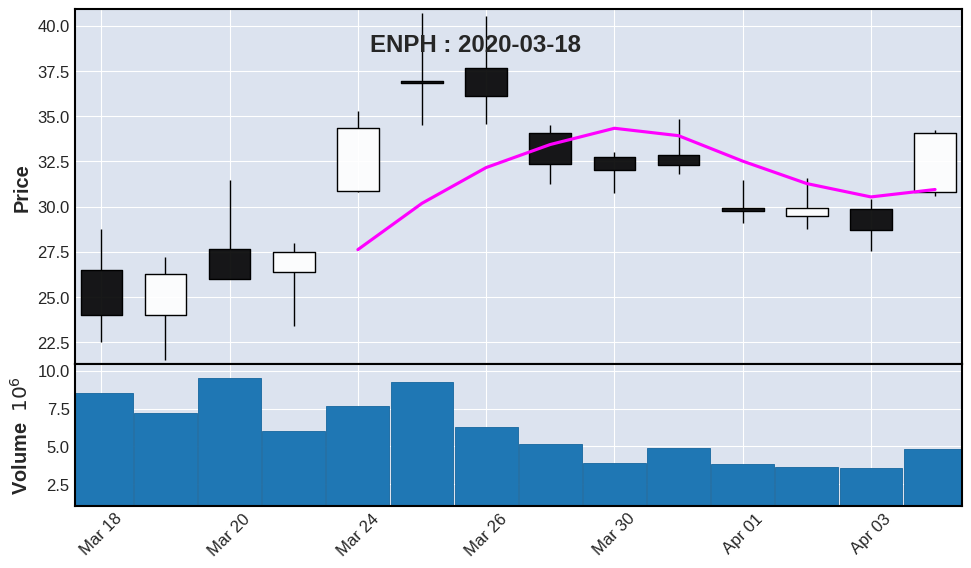

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14 entries, 2020-03-18 to 2020-04-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    14 non-null     float64
 1   High    14 non-null     float64
 2   Low     14 non-null     float64
 3   Close   14 non-null     float64
 4   Volume  14 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 1.2 KB


ValueError: ignored

<Figure size 1000x600 with 0 Axes>

In [ ]:
for index, row in df.iterrows():
    print(row['ticker'], row['pattern_date'], row['pattern_date_X'])
    
    start=row['pattern_date'].strftime('%Y-%m-%d')
    end=row['pattern_date_X'].strftime('%Y-%m-%d')
    
    ticker=yf.Ticker(row['ticker']).history('5y', start=start, end=end, actions=False)

    ticker.info()


    #ticker= round(ticker.pct_change()*100, 2)
    mpf.plot(ticker[start:end], type='candle', 
         volume=True, mav=(20,5),title = row['ticker'] + ' : ' + start,
        tight_layout=True, figratio=(16,9))
    plotPerformance(ticker)
